<a href="https://colab.research.google.com/github/jodejetalo99/Introduccion-al-Aprendizaje-Profundo/blob/main/IPA_T1_JJTL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad Nacional Autónoma de México
# Instituto de Investigaciones en Matemáticas Aplicadas y en Sistemas
# Introducción al Aprendizaje Profundo
# José de Jesús Tapia López
# Tarea 1: Preceptrón y Redes Densas
# 19 de Marzo del 2021

Resuelve los siguientes ejercicios en libretas de Colab independientes que sean replicables.

## Ejercicio 1

1. Un perceptrón o neurona no es capaz de aproximar una función que separe en dos clases (naranja y azul) el conjunto de datos mostrado en la figura 1. Propón una transformación aplicada a los atributos $x_1$ y $x_2$ de forma que puedan ser separados por solo un perceptrón.
Justifica porque la transformación propuesta funciona. (2 puntos.)

Yo propondría la transformación: $x_3=\sqrt{x^2_1 + x^2_2}$ para que sean 'circularmente' separables. Esto se debe a que es la fórmula para obtener el radio de una circunferencia (Y vemos en la imagen que parecer ser que los puntos azules forman una circufenrecia y los puntos naranjas forman un círculo de distintos radios), por lo que podríamos poner un umbral $u$. Así, podríamos graficar en la figura $x_1$ VS $x_3$ y ver si $x_3 > u$, entonces $x_1$ pertenece a la clase azul; pero si $x_3 \leq u$ tendríamos que $x_1$ pertenece a la clase naranja.

## Ejercicio 2

Extiende el ejercicio **1c_reglin.ipynb** visto en clase para realizar regresión lineal con los dos atributos de entrada.

In [1]:
### BIBLIOTECAS

# sistema de archivos
import os

# gráficas
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import *
from matplotlib import cm
# csv
import pandas as pd
# redes neuronales
import torch
# algebra lineal
import numpy as np

# AUXILIARES

URL = 'https://raw.githubusercontent.com/bereml/iap/master/datos/califs.csv'
base_dir = '../datos'
filename = 'califs.csv'
filepath = os.path.join(base_dir, filename)



In [2]:

# Descargamos los datos

! mkdir {base_dir}
! wget -nc {URL} -O {filepath}

mkdir: cannot create directory ‘../datos’: File exists
File ‘../datos/califs.csv’ already there; not retrieving.


In [3]:
#Utilizamos para la lectura del csv e imprimimos los primeros 5 ejemplos.
df = pd.read_csv(filepath)
df.head(5)

,prev,horas,calif
0,5.6,8.2,5.1
1,6.7,9.3,5.9
2,5.1,10.0,5.4
3,5.7,10.4,6.5
4,7.1,10.4,6.7


In [4]:
# Obtengamos los dos atributos 
x = torch.tensor(df.iloc[:, :2].values)
x = x.reshape(-1, 2).type(torch.float32)
print(x.shape)
x[:5]



torch.Size([50, 2])


tensor([[ 5.6000,  8.2000],
        [ 6.7000,  9.3000],
        [ 5.1000, 10.0000],
        [ 5.7000, 10.4000],
        [ 7.1000, 10.4000]])

In [5]:
# la salida:
y_true = torch.tensor(df.iloc[:, 2].values)
y_true = y_true.view(-1, 1).type(torch.float32)
print(y_true.shape)
y_true[:5]

torch.Size([50, 1])


tensor([[5.1000],
        [5.9000],
        [5.4000],
        [6.5000],
        [6.7000]])

In [6]:
# número de ejemplos y atributos
m, d = x.shape
m, d

(50, 2)

Graficamos en 3D para tener una idea de la distribución de los datos:


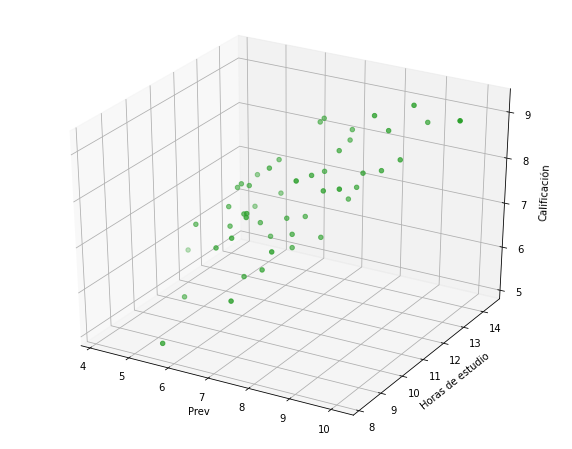

In [7]:
# construimos la instancia de la figura
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0].view(-1).numpy(), x[:,1].view(-1).numpy(), y_true.view(-1).numpy(), c='tab:green', marker='o')

# establecemos las etiquetas de los ejes
ax.set_xlabel('Prev')
ax.set_ylabel('Horas de estudio')
ax.set_zlabel('Calificación')

plt.show()



Recordemos que dado un conjunto de ejemplos con atributos ($x_1, \dots, x_d$) y salidas $y$, la hipótesis de regresión lineal considerando un plano está dada por:
$$\hat{y} = x_1 w_1 + \dots + x_d w_d + b$$

donde $w_i$ y $b$ son pesos y sesgo (parámetros) del modelo y $\hat{y}$ la salida predicha. Podemos expresar la hipótesis en su forma vectorial como:
$$\hat{y} = x w + b$$

Nuestro trabajo consiste en estimar (aprender) los parámetros $w_i$ y $b$. Por el momento supongamos que proponemos valores para los parámetros y hagamos inferencia:


De la imagen anterior podemos apreciar que parece ser que sí existe una asociación lineal entre las variables independientes (las $x's$) y la variable dependiente (la $y$)

In [8]:
# parámetros que nos regalo el oráculo, estos fueron puestos
# 'aleatoriamente'
w = torch.tensor([[0.6030],[0.1785]])
b = torch.tensor([0.0496])

# inferencia
y_pred = x @ w + b


In [9]:
# preparamos los métodos para visualizar en 3D el plano

x0_s, x1_s = np.meshgrid(x[:,0].view(-1).numpy(), x[:,1].view(-1).numpy())
#np.linspace(x[:,0].view(-1).numpy().min(), x[:,0].view(-1).numpy().max(), 100),np.linspace(x[:,1].view(-1).numpy().min(), x[:,1].view(-1).numpy().max(), 100)
_, y_pred_3d = np.meshgrid(x[:,1].view(-1).numpy(), y_pred.view(-1).numpy())

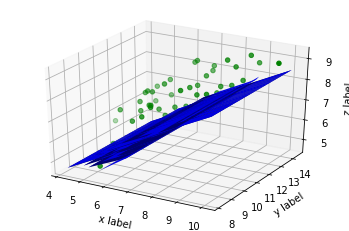

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')              
ax.plot_surface(x0_s, x1_s, y_pred_3d.T.reshape(x0_s.shape), color='b')
ax.scatter(x[:,0].view(-1).numpy(), x[:,1].view(-1).numpy(), y_true.view(-1).numpy(), color='green')
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_zlabel('z label')
plt.show()


Podemos observar de la imagen anterior que el plano es una aproximación decente, aunque idealmente debería ajustarse todavía mejor, ya que a ojo todo indica que debe tener más inclinación o trasladar el plano un poco más hacia arriba. Para ello, vamos a calcular el error cuadrático medio y utilizar el descenso por gradiente para mejorar los parámetros de la regresión y obtener un mejor plano que se ajuste a los datos.

La pérdida para este modelo es el error cuadrático medio y queda expresado de la siguiente manera:
$$ J(w, b) = \frac{1}{2m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})^2} $$

en su forma vectorial:
$$ J(w, b) = \frac{1}{2m} (\hat{y} - y)^T (\hat{y} - y) $$

Para los parámetros propuestos, la pérdida se puede implementar como:

In [11]:
loss = (y_pred - y_true).T @ (y_pred - y_true) / (2 * m)
loss

tensor([[0.7013]])

El algoritmo del gradiente descendente se basa en el gradiente de la pérdida respecto de los parámetros:
$$\frac{\partial J(w_j)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m}{x^{(i)}_j(\hat{y}^{(i)} - y^{(i)})}$$$$\frac{\partial J(b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})}$$

en su forma vectorial:
$$\Delta J(w) = \frac{1}{m} x^T (\hat{y} - y)$$$$\Delta J(b) = \frac{1}{m} \sum_{i=1}^{m}{(\hat{y} - y)^{(i)}}$$

Para los parámetros propuestos, el computo gradiente se puede implementar como:

In [12]:
grad_w = (x.T @ (y_pred - y_true)) / m
grad_b = (y_pred - y_true).sum() / m
grad_w, grad_b

(tensor([[ -6.6975],
         [-12.5801]]), tensor(-1.0291))

Ahora implementemos todo en una función:

In [13]:
### Entrenamiento

# la misma función que en la de ustedes en el git, 
# solo que por defecto yo lo cambio a que sean 50 pasos
def train(x, y_true, alpha=0.01, steps=50):
    """Fits linear regression."""

    # ejemplos, atributos
    m, d = x.shape

    # inicialización de parámetros
    w = torch.zeros(d, 1)
    b = torch.zeros(1)

    # histórico de pérdidas
    loss_hist = []

    # ciclo de entrenamiento
    for i in range(steps):

        # cómputo de la hipótesis
        y_pred = x @ w + b

        # cómputo de la pérdida
        loss = (y_pred - y_true).T @ (y_pred - y_true) / (2 * m)

        # cómputo del gradiente
        grad_w = (x.T @ (y_pred - y_true)) / m
        grad_b = (y_pred - y_true).sum() / m

        # actualización de parámetros
        w = w - alpha * grad_w
        b = b - alpha * grad_b

        # histórico de pérdida
        loss_hist.append(loss)

    return w, b, loss_hist



Entrenemos un modelo:

In [14]:
w, b, loss_hist = train(x, y_true)
w, b

(tensor([[0.2440],
         [0.4517]]), tensor([0.0357]))

Recordemos que en un principio colocamos los valores de $w= tensor([[0.6030],[0.1785]])$ y $b = tensor([0.0496])$. Ahora, con la optimización se vieron modificados y con estos parámetros mejora el ajuste del plano a los datos.



Grafiquemos la evolución de la pérdida:


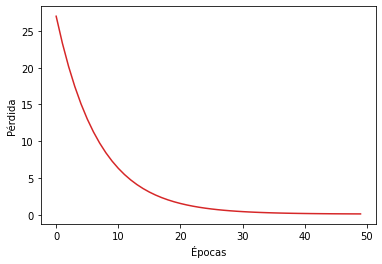

In [15]:
plt.figure()
plt.plot(range(len(loss_hist)), loss_hist, color='tab:red')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.show()

Entonces, vamos a graficar el plano ahora con estos nuevos $w's$ (ya utilizando descenso por gradiente).

In [16]:
# inferencia
y_pred2 = x @ w + b

In [17]:
# preparamos los métodos para visualizar en 3D el plano

x0_s2, x1_s2 = np.meshgrid(x[:,0].view(-1).numpy(), x[:,1].view(-1).numpy())
_, y_pred_3d2 = np.meshgrid(x[:,1].view(-1).numpy(), y_pred2.view(-1).numpy().T)

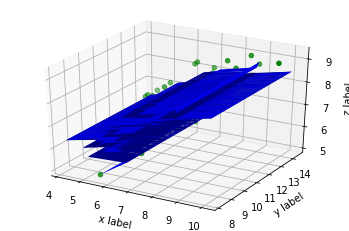

In [18]:
fig = plt.figure()
ax = fig.gca(projection='3d')              
ax.plot_surface(x0_s2, x1_s2, y_pred_3d2.T.reshape(x0_s2.shape), color='b')
ax.scatter(x[:,0].view(-1).numpy(), x[:,1].view(-1).numpy(), y_true.view(-1).numpy(), color='green')
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_zlabel('z label')
plt.show()

De la figura anterior podemos apreciar que tenemos un plano que mejor ajusta a la nube de puntos incial (mejor que el que presentamos en un incio).

## Ejercicio 3

3. Entrena una red completamente conectada para aproximar la compuerta XOR.

In [19]:
import random
# redes neuronales
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as T

In [20]:
def set_seed(seed=171299):
    """Initializes pseudo-random number generators."""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    
# reproducibilidad
set_seed()

In [21]:
def step(z):
    """Computes step function."""
    return 1.0 if z > 0.5 else 0.0

In [22]:
# vectorizamos la función para que
# aplique a un arreglo de entradas
step_vec = np.vectorize(step)

In [23]:
class XOR(nn.Module):
    
    def __init__(self):   
        """
        Inicialización de las capas del modelo
        """
        super(XOR, self).__init__()
        self.fc1 = nn.Linear(2,2) 
        self.fc2 = nn.Linear(2,1)
     
    def forward(self,x):
        """
        Definición de la estructura del modelo 
        (se aplica como función de activación una sigmoide)
        Parámetros: 
        x (tensor): entrada del modelo
        Devuelve: 
        y_pred: predicción
        """
        x_in = torch.sigmoid(self.fc1(x)) 
        y_pred = torch.sigmoid(self.fc2(x_in)) 
        return y_pred
    
xor = XOR()

# Datos de entrenamiento
x = torch.tensor([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])
y = torch.tensor([[0.],[1.],[1.],[0.]])

# Usamos el error cuadrático medio como criterio
criterio = nn.MSELoss()                            
# optimizador Adam (método de optimización estocástica) modifica la tasa de aprendizaje
optimizador = optim.Adam(xor.parameters(), lr=0.1)  

epocas = 1000

for e in range(epocas):
    # Establece los gradientes de todos los tensores optimizados a cero.
    optimizador.zero_grad()
    # salida de la XOR    
    salida = xor(x)

    # forward, backward y optimización

    # función de perdida basada en el criterio
    perdida = criterio(salida, y)
    if e % 100 == 0:
      print("Época:{0}, Pérdida: {1}".format(e,perdida))
    # Los gradientes son "almacenados" por los propios tensores (
    # una vez que llama backward() en la pérdida 
    perdida.backward()
    # hace que el optimizador itere sobre todos los parámetros (tensores) 
    # que se supone debe actualizar
    optimizador.step() 

prueba = xor(x)
print('\nx_1 \tx_2 \ty\ty_hat')
print('-----------------------------')
for i in range(x.shape[0]):
    x1, x2 = x[i]
    y_hat = step_vec(prueba.detach())
    print(f'{x1}\t{x2}\t{y[i][0]}\t{y_hat[i][0]}')


Época:0, Pérdida: 0.2615337371826172
Época:100, Pérdida: 0.005222637206315994
Época:200, Pérdida: 0.0011664106277748942
Época:300, Pérdida: 0.0006026178598403931
Época:400, Pérdida: 0.00037941010668873787
Época:500, Pérdida: 0.0002648420922923833
Época:600, Pérdida: 0.0001970729645108804
Época:700, Pérdida: 0.00015317954239435494
Época:800, Pérdida: 0.00012288903235457838
Época:900, Pérdida: 0.00010098466009367257

x_1 	x_2 	y	y_hat
-----------------------------
0.0	0.0	0.0	0.0
0.0	1.0	1.0	1.0
1.0	0.0	1.0	1.0
1.0	1.0	0.0	0.0


Podemos observar que esta red aproxima bien la compuerta XOR prácticamente a partir de la época 100 con una pérdida que ya empieza a acercarse mucho a 0. Sin embargo, se intentó usar como optimizador el SGD pero requería de muchas más épocas (casi 10 veces más, es decir,  10000) para aproximar bien a dicha compuerta (la péridia disminuía más lentamente). 

Más aún, con una tasa de aprendizaje (lr) de 0.01, tanto en el optimizador Adam como en el SGD, también se tardaba más en disminuir la pérdida y la red no aproximaba bien la compuerta XOR. Creo que esto se debe a que las tasas de aprendizaje más pequeñas requieren más épocas de entrenamiento (requiere más tiempo para entrenar) debido a los cambios más pequeños realizados en los pesos en cada actualización, mientras que las tasas de aprendizaje más grandes dan como resultado cambios rápidos y requieren menos épocas de entrenamiento. Sin embargo, las tasas de aprendizaje más altas a menudo dan como resultado un conjunto final de pesos subóptimo. Por ello, creo que en principio un lr de 0.1 fue un número adecuado.

## Ejercicio 4

4. Entrena una red completamente conectada para clasificación multiclase en el conjunto CIFAR10.

In [24]:
# biblioteca para inspeccionar arquitecturas
# https://github.com/tyleryep/torchinfo
!pip install torchinfo

In [25]:
# funciones aleatorias
import random
# tomar n elementos de una secuencia
from itertools import islice as take

# gráficas
import matplotlib.pyplot as plt
# arreglos multidimensionales
import numpy as np
# procesamiento de imágenes
from skimage import io
# redes neuronales
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
# inspección de arquitectura
from torchinfo import summary
# barras de progreso
from tqdm import trange

In [26]:
# directorio de datos
DATA_DIR = '../data'

# tamaño del lote
BATCH_SIZE = 32
# filas y columnas de la regilla de imágenes
ROWS, COLS = 4, 8

# CIFAR-10 classes
CLASSES = {0:'airplane',1:'car',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}


def display_grid(xs, titles, rows, cols, figsize=(12, 6)):
    """Displays examples in a grid."""
    fig, ax = plt.subplots(rows, cols, figsize=figsize)
    i = 0
    for r in range(rows):
        for c in range(cols):
            ax[r, c].imshow(xs[i], cmap='gray')
            ax[r, c].set_title(titles[i])
            ax[r, c].set_xticklabels([])
            ax[r, c].set_yticklabels([])
            i += 1
    fig.tight_layout()
    plt.show()


def display_batch(x, titles, rows, cols, figsize=(12, 6)):
    """Displays a batch of processed examples in a grid."""
    # desnormalizamos [0, 1] => [0, 255]
    x *= 255
    # rotamos canales (C x H x W) => (H x W x C)
    x = x.permute(0, 2, 3, 1)
    # convertimos a entero
    x = (x.numpy()).astype(np.uint8)
    # aplanamos canal 
    ### NOTAMOS QUE SE LE AGREGÓ EL NÚMERO DE CANALES DE UNA
    ### IMAGEN EN RGB, EL CUAL ES 3
    x = x.reshape(*x.shape[:3],3)
    # desplegamos
    display_grid(x, titles, rows, cols, figsize)

# reproducibilidad
set_seed()


In [27]:
# creamos el Dataset
ds = CIFAR10(
    # directorio de datos
    root=DATA_DIR, 
    # subconjunto de entrenamiento
    train=True, 
    # convertir la imagen a ndarray
    transform=np.array, 
    # descargar el conjunto
    download=True
)

Files already downloaded and verified


images[0] shape=(32, 32, 3) dtype=uint8


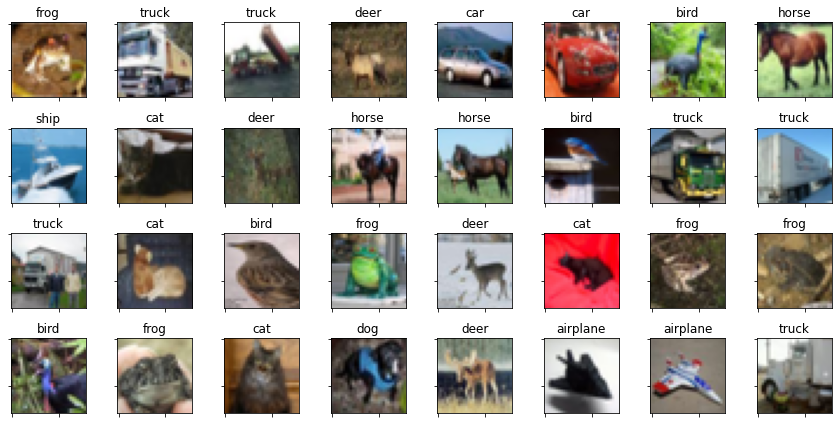

In [28]:
# cargamos algunas imágenes
images, labels = [], []
for i in range(BATCH_SIZE):
    x, y = ds[i]
    images.append(x)
    labels.append(y)

# desplegamos
print(f'images[0] shape={images[0].shape} dtype={images[0].dtype}')
titles = [CLASSES[y] for y in labels]
display_grid(images, titles, ROWS, COLS)

x shape=torch.Size([32, 3, 32, 32]) dtype=torch.float32
y shape=torch.Size([32]) dtype=torch.int64


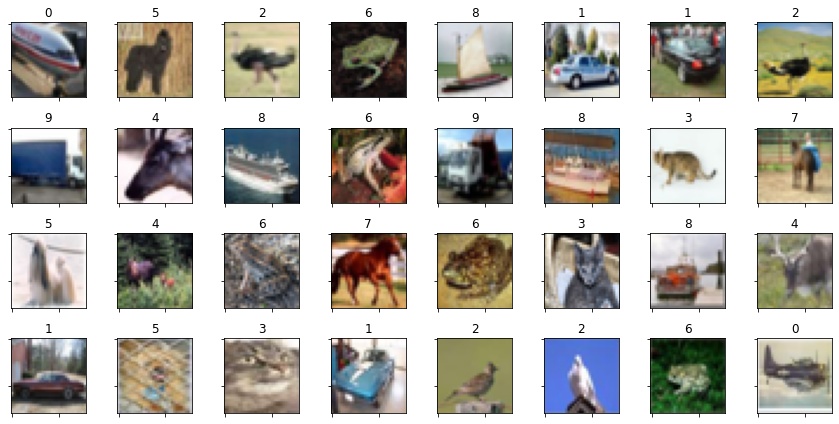

In [29]:
### Entrenamiento

# transformación que convierte una imagen:
#   de numpy.ndarray    (H x W x C) en rango [0, 255]
#   a torch.FloatTensor (C x H x W) en rango [0, 1]
tsfm = T.ToTensor()

# creamos un Dataset
trn_ds = CIFAR10(
    # directorio de datos
    root=DATA_DIR,
    # subconjunto de entrenamiento
    train=True,
    # transformación
    transform=tsfm
)

# creamos un DataLoader
trn_dl = DataLoader(
    # conjunto
    trn_ds,
    # tamaño del lote
    batch_size=BATCH_SIZE,
    # desordenar
    shuffle=True
)

# desplegamos un lote de imágenes
x, y = next(iter(trn_dl))
print(f'x shape={x.shape} dtype={x.dtype}')
print(f'y shape={y.shape} dtype={y.dtype}')
display_batch(x, y.tolist(), ROWS, COLS)


In [30]:
### Prueba

# creamos un Dataset
tst_ds = CIFAR10(
    # directorio de datos
    root=DATA_DIR, 
    # subconjunto de entrenamiento
    train=False,
    # transformación
    transform=tsfm
)

# creamos un DataLoader
tst_dl = DataLoader(
    # subconjunto
    tst_ds,
    # tamaño del lote
    batch_size=BATCH_SIZE,
    # desordenar
    shuffle=True
)

# desplegamos un lote de imágenes
x, y = next(iter(tst_dl))
print(f'x shape={x.shape} dtype={x.dtype}')
print(f'y shape={y.shape} dtype={y.dtype}')
#display_batch(x, y.tolist(), ROWS, COLS)

x shape=torch.Size([32, 3, 32, 32]) dtype=torch.float32
y shape=torch.Size([32]) dtype=torch.int64


Vamos a utilizar a la ReLU como función de activación, ya que al final del ejercicio se mostrará que tuvo un mejor rendimiento que con la sigmoide.

In [41]:
### definición del modelo y la arquitectura

class FCN(nn.Module):
    
    # inicializador
    def __init__(self):
        
        # inicilización del objeto padre, obligatorio
        super(FCN, self).__init__()
        
        # tamaño de las capas
        self.I = 3 * 32 * 32
        FC1, FC2 = 128, 10
        
        # definición de capas
        self.cls = nn.Sequential(
            
            # fc1
            # [M, 3x32x32] => [M, 128]
            nn.Linear(self.I, FC1),
            nn.ReLU(),
            
            # fc2
            # [M, 128] => [M, 10]
            nn.Linear(FC1, FC2)
        
        )
    
    # método para inferencia
    def forward(self, x):
        
        # aplanamos los pixeles de la imagen
        # [M, 3, 32, 32] => [M, 3x32x32]
        x = x.view(-1, self.I)
        
        # inferencia
        # [M, 1x28x28]
        x = self.cls(x)
        
        return x

In [42]:
#instancia de la arquitectura

model = FCN()
print(model)



FCN(
  (cls): Sequential(
    (0): Linear(in_features=3072, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [43]:
# inferencia con datos sintéticos
x = torch.zeros(1, 3, 32, 32)
y = model(x)
print(f'{x.shape} => {y.shape}')

torch.Size([1, 3, 32, 32]) => torch.Size([1, 10])


In [44]:
# Inspección de la arquitectura

summary(model, (3, 32, 32), device='cpu', verbose=0)

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [1, 10]                   --
|    └─Linear: 2-1                       [1, 128]                  393,344
|    └─ReLU: 2-2                         [1, 128]                  --
|    └─Linear: 2-3                       [1, 10]                   1,290
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
Total mult-adds (M): 0.79
Input size (MB): 0.01
Forward/backward pass size (MB): 0.00
Params size (MB): 1.58
Estimated Total Size (MB): 1.59

In [51]:
# Ciclo de entrenamiento supervisado.

def train_epoch(dl, model, opt):

    # por cada lote
    for x, y_true in dl:
        
        # computamos logits
        y_lgts = model(x)
        
        # computamos la pérdida
        loss = F.cross_entropy(y_lgts, y_true)
        
        # vaciamos los gradientes
        opt.zero_grad()
        
        # retropropagamos
        loss.backward()
        
        # actualizamos parámetros
        opt.step()


def eval_epoch(dl, model, num_batches=None):

    # evitamos que se registren las operaciones 
    # en la gráfica de cómputo
    with torch.no_grad():

        # historiales
        losses, accs = [], []

        # validación de la época con num_batches
        # si num_batches==None, se usan todos los lotes
        for x, y_true in take(dl, num_batches):

            # computamos los logits
            y_lgts = model(x)

            # computamos los puntajes
            y_prob = F.softmax(y_lgts, 1)

            # computamos la clases
            y_pred = torch.argmax(y_prob, 1)

            # computamos la pérdida
            loss = F.cross_entropy(y_lgts, y_true)

            # computamos la exactitud
            acc = (y_true == y_pred).type(torch.float32).mean()

            # guardamos históricos
            losses.append(loss.item())
            accs.append(acc.item())

        # promediamos
        loss = np.mean(losses) * 100
        acc = np.mean(accs) * 100

        return loss, acc
        
        
def train(model, trn_dl, tst_dl, lr=1e-3, epochs=20,
          trn_batches=None, tst_batches=None):

    # historiales
    loss_hist, acc_hist = [], []
    
    # optimizador
    opt = optim.SGD(model.parameters(), lr=lr)

    # ciclo de entrenamiento
    for epoch in trange(epochs):

        # entrenamos la época
        train_epoch(trn_dl, model, opt)

        # evaluamos la época en entrenamiento
        trn_loss, trn_acc = eval_epoch(trn_dl, model, trn_batches)
        # evaluamos la época en prueba
        tst_loss, tst_acc = eval_epoch(tst_dl, model, tst_batches)

        # guardamos historial
        loss_hist.append([trn_loss, tst_loss])
        acc_hist.append([trn_acc, tst_acc])

        # imprimimos progreso
        print(f'E{epoch:02} '
              f'loss=[{trn_loss:6.2f},{tst_loss:6.2f}] '
              f'acc=[{trn_acc:5.2f},{tst_acc:5.2f}]')

    return loss_hist, acc_hist

Aunque por defecto se colocaron 20 épocas, las duplicamos para mejorar la exactitud, disminuir la pérdida y en consecuencia mejorar las predicciones.

In [52]:
# Entrenamos un modelo:

# instanciamos un modelo
model = FCN()
# entrenamos
loss_hist, acc_hist = train(model, trn_dl, tst_dl,epochs=40)

  2%|▎         | 1/40 [00:18<12:03, 18.55s/it]

E00 loss=[212.80,212.98] acc=[27.09,27.44]


  5%|▌         | 2/40 [00:37<11:45, 18.56s/it]

E01 loss=[201.35,201.63] acc=[30.09,29.98]


  8%|▊         | 3/40 [00:55<11:29, 18.62s/it]

E02 loss=[195.12,195.37] acc=[31.77,31.90]


 10%|█         | 4/40 [01:14<11:10, 18.62s/it]

E03 loss=[191.21,191.56] acc=[33.71,33.55]


 12%|█▎        | 5/40 [01:32<10:48, 18.54s/it]

E04 loss=[188.38,188.58] acc=[33.95,33.75]


 15%|█▌        | 6/40 [01:51<10:32, 18.60s/it]

E05 loss=[186.08,186.44] acc=[35.36,35.34]


 18%|█▊        | 7/40 [02:12<10:32, 19.18s/it]

E06 loss=[184.15,184.47] acc=[36.01,35.64]


 20%|██        | 8/40 [02:30<10:04, 18.90s/it]

E07 loss=[182.67,183.05] acc=[36.26,36.31]


 22%|██▎       | 9/40 [02:48<09:41, 18.77s/it]

E08 loss=[180.92,181.27] acc=[37.19,37.29]


 25%|██▌       | 10/40 [03:07<09:20, 18.70s/it]

E09 loss=[179.49,179.82] acc=[37.58,37.34]


 28%|██▊       | 11/40 [03:25<08:58, 18.58s/it]

E10 loss=[178.21,178.68] acc=[37.78,37.51]


 30%|███       | 12/40 [03:44<08:39, 18.54s/it]

E11 loss=[177.54,177.90] acc=[38.22,37.97]


 32%|███▎      | 13/40 [04:02<08:21, 18.56s/it]

E12 loss=[175.94,176.32] acc=[38.48,38.64]


 35%|███▌      | 14/40 [04:21<08:01, 18.53s/it]

E13 loss=[174.73,175.27] acc=[39.42,39.32]


 38%|███▊      | 15/40 [04:40<07:45, 18.62s/it]

E14 loss=[173.55,173.90] acc=[39.59,39.04]


 40%|████      | 16/40 [04:58<07:27, 18.63s/it]

E15 loss=[172.55,173.06] acc=[40.08,40.02]


 42%|████▎     | 17/40 [05:17<07:10, 18.70s/it]

E16 loss=[171.59,172.06] acc=[40.41,40.41]


 45%|████▌     | 18/40 [05:36<06:51, 18.70s/it]

E17 loss=[170.56,170.94] acc=[40.41,40.34]


 48%|████▊     | 19/40 [05:54<06:31, 18.66s/it]

E18 loss=[169.76,170.18] acc=[40.77,40.61]


 50%|█████     | 20/40 [06:13<06:12, 18.62s/it]

E19 loss=[168.91,169.49] acc=[40.67,40.63]


 52%|█████▎    | 21/40 [06:31<05:51, 18.49s/it]

E20 loss=[167.84,168.52] acc=[41.62,41.26]


 55%|█████▌    | 22/40 [06:50<05:33, 18.50s/it]

E21 loss=[166.80,167.51] acc=[41.82,41.61]


 57%|█████▊    | 23/40 [07:08<05:16, 18.60s/it]

E22 loss=[166.01,166.69] acc=[42.17,41.60]


 60%|██████    | 24/40 [07:27<04:58, 18.68s/it]

E23 loss=[165.37,166.20] acc=[42.55,42.04]


 62%|██████▎   | 25/40 [07:46<04:40, 18.72s/it]

E24 loss=[164.34,165.13] acc=[42.95,42.47]


 65%|██████▌   | 26/40 [08:05<04:21, 18.67s/it]

E25 loss=[163.99,164.95] acc=[42.90,42.43]


 68%|██████▊   | 27/40 [08:23<04:02, 18.63s/it]

E26 loss=[162.96,163.98] acc=[43.39,43.04]


 70%|███████   | 28/40 [08:42<03:43, 18.65s/it]

E27 loss=[162.29,163.25] acc=[43.57,43.04]


 72%|███████▎  | 29/40 [09:00<03:25, 18.64s/it]

E28 loss=[162.04,163.13] acc=[43.47,42.96]


 75%|███████▌  | 30/40 [09:19<03:06, 18.64s/it]

E29 loss=[161.12,162.28] acc=[43.90,43.50]


 78%|███████▊  | 31/40 [09:38<02:48, 18.68s/it]

E30 loss=[160.13,161.32] acc=[44.43,43.71]


 80%|████████  | 32/40 [09:57<02:30, 18.78s/it]

E31 loss=[159.78,161.11] acc=[44.44,43.76]


 82%|████████▎ | 33/40 [10:16<02:11, 18.75s/it]

E32 loss=[159.23,160.57] acc=[44.88,44.06]


 85%|████████▌ | 34/40 [10:34<01:52, 18.75s/it]

E33 loss=[158.42,159.94] acc=[44.97,43.99]


 88%|████████▊ | 35/40 [10:53<01:33, 18.72s/it]

E34 loss=[158.01,159.62] acc=[45.02,44.18]


 90%|█████████ | 36/40 [11:12<01:14, 18.67s/it]

E35 loss=[157.30,159.02] acc=[45.52,44.56]


 92%|█████████▎| 37/40 [11:30<00:56, 18.68s/it]

E36 loss=[158.10,159.93] acc=[44.67,43.89]


 95%|█████████▌| 38/40 [11:49<00:37, 18.79s/it]

E37 loss=[156.64,158.47] acc=[45.63,44.41]


 98%|█████████▊| 39/40 [12:08<00:18, 18.89s/it]

E38 loss=[156.09,157.97] acc=[45.96,44.63]


100%|██████████| 40/40 [12:27<00:00, 18.70s/it]

E39 loss=[155.51,157.54] acc=[46.12,45.36]


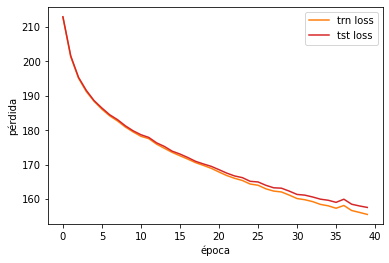

In [53]:
# Gráficas de pérdidas y exactitud

trn_loss, tst_loss = zip(*loss_hist)
plt.plot(trn_loss, 'tab:orange', label='trn loss')
plt.plot(tst_loss, 'tab:red', label='tst loss')
plt.legend(loc='upper right')
plt.xlabel('época')
plt.ylabel('pérdida')
plt.show()



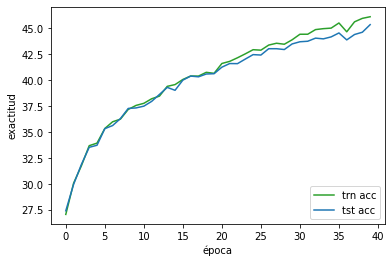

In [54]:


trn_acc, tst_acc = zip(*acc_hist)
plt.plot(trn_acc, 'tab:green', label='trn acc')
plt.plot(tst_acc, 'tab:blue', label='tst acc')
plt.legend(loc='lower right')
plt.xlabel('época')
plt.ylabel('exactitud')
plt.show()



In [55]:
# evaluación final

# evaluamos en entrenamiento
trn_loss, trn_acc = eval_epoch(trn_dl, model)
# evaluamos en prueba
tst_loss, tst_acc = eval_epoch(tst_dl, model)
print(f'loss=[{trn_loss:6.2f},{tst_loss:6.2f}] '
      f'acc=[{trn_acc:5.2f},{tst_acc:5.2f}]')


loss=[155.50,157.58] acc=[46.12,45.30]


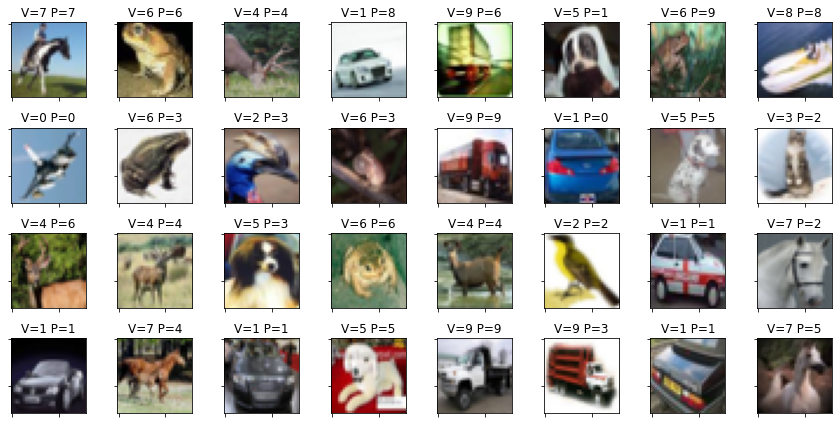

In [56]:
# inferencia

with torch.no_grad(): 
    x, y_true = next(iter(tst_dl))
    y_lgts = model(x)
    y_prob = F.softmax(y_lgts, 1)
    y_pred = torch.argmax(y_prob, 1)
    titles = [f'V={t} P={p}' for t, p in zip(y_true, y_pred)]
    display_batch(x, titles, ROWS, COLS)



### ¿Por qué se presentó la realización de este ejercicio usando una ReLU y se usaron más de 20 épocas?

En un principio se resolvió utilizando como función de activación a la Sigmoide (tal cual la misma arquitectura que se usó en clase para MNIST), obteniendo estos resultados de pérdida, accuracy y de predicción:

### Pérdida 

![Sigmoide1](https://raw.githubusercontent.com/jodejetalo99/Introduccion-al-Aprendizaje-Profundo/main/Figuras/T1/photo5080234837406755067.jpg)

### Accuracy 

![Sigmoide2](https://raw.githubusercontent.com/jodejetalo99/Introduccion-al-Aprendizaje-Profundo/main/Figuras/T1/photo5080234837406755068.jpg)

### Predicciones 

![Sigmoide3](https://raw.githubusercontent.com/jodejetalo99/Introduccion-al-Aprendizaje-Profundo/main/Figuras/T1/photo5080234837406755069.jpg)


Posteriormente, siguiendo la misma arquitectura y únicamente modificando la función de activación a una ReLU, obtuvimos lo siguiente:

### Pérdida 

![ReLu1](https://raw.githubusercontent.com/jodejetalo99/Introduccion-al-Aprendizaje-Profundo/main/Figuras/T1/photo5080234837406755064.jpg)

### Accuracy 

![ReLu2](https://raw.githubusercontent.com/jodejetalo99/Introduccion-al-Aprendizaje-Profundo/main/Figuras/T1/photo5080234837406755065.jpg)

### Predicciones 

![ReLu3](https://raw.githubusercontent.com/jodejetalo99/Introduccion-al-Aprendizaje-Profundo/main/Figuras/T1/photo5080234837406755066.jpg)


Como podemos observar en las imágenes anteriores, tenemos una mayor accuracy usando una ReLU que si usamos una Sigmoide, aunque aún así en ambas es muy baja; con aproximadamente 42% de exactitud en la ReLU y 34% en la Sigmoide; y una menor pérdida con la ReLU que con la sigmoide. Esto lo podemos verificar al realizar las predicciones, pues podemos observar que usando dichas funciones de activación, en ambas se predicen mal varias etiquetas. Usando la sigmoide, en la respectiva imagen notamos que se equivocó en 20 de 32 ($\frac{12}{32} = 37.5\%$ de exactitud en las predicciones); mientras que usando en la ReLU, vemos que se equivocó en 19 de 32 ($\frac{13}{32} = 40.625\%$ de exactitud en las predicciones)


Por ello, en este notebook se dejó a la ReLU y se colocaron 40 épocas. Nos damos cuenta que la pérdida  disminuyó y la exactitud subió a aproximadamente a 46%, y creo que no fue algo muy significativo. Pues se tardó más de 12 minutos y la mejora fue poca. Por lo tanto, creo que se debe modificar más la arquitectura de la red, principalmente agregando más capas, intentando con otras funciones de activación, con otros optimizadores, etc..

También intenté con el optimizador Adam (con función de activación ReLU), pero como que se sobreajustaba: 

### Pérdida 

![Adam1](https://raw.githubusercontent.com/jodejetalo99/Introduccion-al-Aprendizaje-Profundo/main/Figuras/T1/photo5080234837406755084.jpg)

### Accuracy 

![Adam2](https://raw.githubusercontent.com/jodejetalo99/Introduccion-al-Aprendizaje-Profundo/main/Figuras/T1/photo5080234837406755083.jpg)